# COMP6246 Machine Learning Technologies (2025/26)
# Lab 5 – Perceptrons, Deep Net, and Convolutional Neural Net

In this lab, we introduce how to implement a perceptron, a deep neural network (DNN) and also a convolutional neural network (CNN). We also present you with code that is working, but yields poor results. We expect you to spot the issues and improve the code. Exercises are also provided at the end of each section to improve your technical skills.

## Setup

_Make sure that the following code is executed before every other sections of this lab_

In [3]:
# Common imports
import os
import numpy as np

import tensorflow as tf
tf.__version__

# To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Clear tensorflow's and reset seed
def reset_graph(seed=None):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

## A Perceptron

In this section, we will use an artificial neuron (aka _perceptron_) to perform binary classification on linearly separable data. Specifically, we will use a portion of the Iris dataset; the description of this dataset can be found at <a href="https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html">https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html</a>.

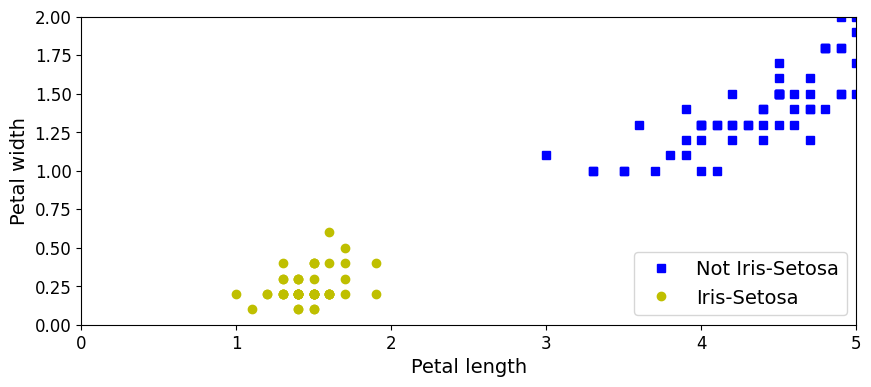

In [8]:
from sklearn.datasets import load_iris

# get dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(int) # classify them as either setosa or not setosa

# visualise the data
axes = [0, 5, 0, 2]
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

Clearly, this task can be easily done by using a linear classifier. Could you visualise the linear decision boundary on the figure above? Where should it be?

Now, let's move on to implementing a perceptron by using Scikit-learn.

In [25]:
from sklearn.linear_model import Perceptron

# initialise and train a perceptron
pct = Perceptron(max_iter=100, random_state=None)
pct.fit(X, y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,None


Notice that there are many parameters that you can tweak here. You can have a look at the description of each parameter in the Scikit-Learn's documentation <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html</a>

Next, we will extract the decision boundary from the model. Below we show a general way of extracting a decision boundary with any model. Note that it can be very computationally expensive if the feature space is large.

/Users/jamescarlyle/phd/comp6246/.venv310/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jamescarlyle/phd/comp6246/.venv310/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jamescarlyle/phd/comp6246/.venv310/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


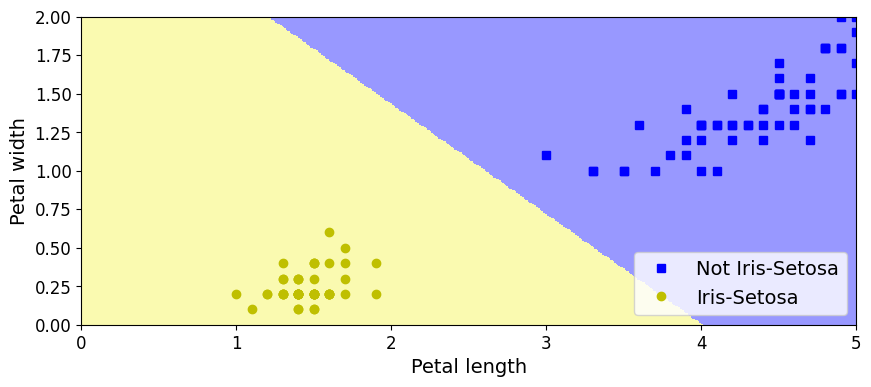

In [26]:
# sampling and predict the whole space of features
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 200).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = pct.predict(X_new)
zz = y_predict.reshape(x0.shape)

# plot the datapoints again
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# get a nice color
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# plot the predicted samples of feature space
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

**_Exercise 1_**
1. The decision boundary of a single perceptron is a single straight line, but the above plot shows differently! Fix this plot. (_Hint_: you need to sample the feature space more. Change the parameter of `np.linspace` above to generate more points. Have a look at the documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html.)

linspace changed to 200, boundary switches to petal-length==2.75

2. Try running the code in [3] and [4] multiple times; two snippets above where a network is initialised, trained, and plotted. Do you always get the same decision boundary? Why?




## Activation Functions

There are many activation functions that can be used in a neuron. Different functions result in different behaviours, and consequently different pros & cons. Some of the popular activation functions are defined below.

$$ \text{heaviside} (z) = \begin{cases} 1 & \quad \text{if } z >= 0 \\ 0 & \quad \text{otherwise} \end{cases} $$

$$ \text{logit} (z) = \frac{1}{1 + e^{-z}} $$

$$ \text{relu} (z) = \max{\left( 0 , z \right)} $$

$$ \text{leaky_relu} (z, \alpha) = \max{\left( \alpha z , z \right)} $$

$$ \text{elu} (z, \alpha) = \begin{cases} \alpha \left( e^z - 1 \right) & \quad \text{if } z < 0 \\ z & \quad \text{otherwise} \end{cases} $$

**_Exercise 2_**
Complete the cell below with the code for the activation functions listed (see equations). Note that they must be able to process NumPy arrays as well.

In [27]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def logit(z): # modify this function. Hint: Use np.exp()
    return 1/(1+np.exp(-z))

def relu(z): # modify this function. Hint: Use np.maximum()
    return np.maximum(0, z)

def leaky_relu(z, alpha): # modify this function and set default alpha to 0.01
    return 0

def elu(z, alpha=1): # No need to modify this function!
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, # No need to modify this function!
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

Now we plot these different activation functions using the code below.

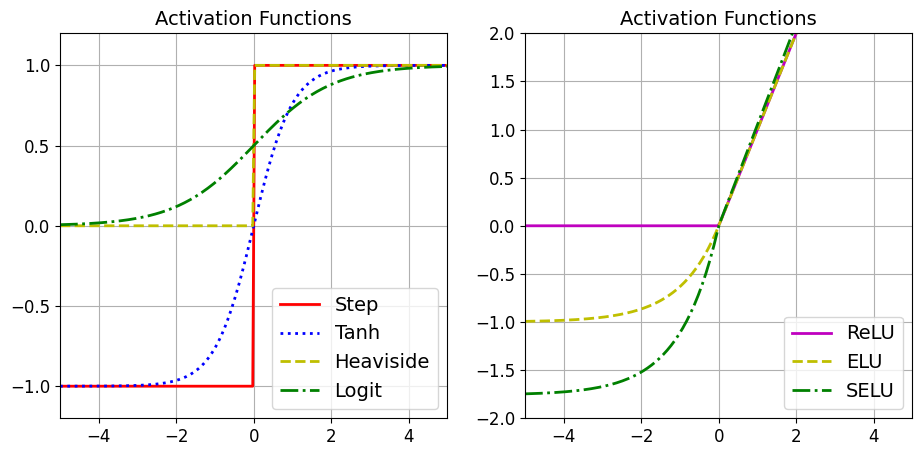

In [29]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,11))

plt.subplot(221)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, np.tanh(z), "b:", linewidth=2, label="Tanh")
plt.plot(z, heaviside(z), "y--", linewidth=2, label="Heaviside")
plt.plot(z, logit(z), "g-.", linewidth=2, label="Logit")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(222)
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")
# plt.plot(z, leaky_relu(z, 0.05), "k:", linewidth=2, label="Leaky_ReLU")
plt.plot(z, elu(z), "y--", linewidth=2, label="ELU")
plt.plot(z, selu(z), "g-.", linewidth=2, label="SELU")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -2, 2])

plt.show()

You should be able to see the following characteristics from the graph:
- Step function and Heaviside function are quite similar except for their output ranges.
- Similarly, the hyperbolic tangent and the logit/sigmoidal function are nearly the same except for their output ranges.
- Lastly, all variants of ReLU functions behave differently only when the input sum of a perceptron is lower than zero.

Note that different functions have different sensitivity to the perceptron input.

## (Deeper) Neural Net for MNIST on TensorFlow

In this section, we will construct and train a _deeper_ neural network with TensorFlow to perform classification. To train a large number of neurons, we would generally need a large dataset. So we will use MNIST (https://keras.io/api/datasets/mnist/) from now on. Keras API provides some utility functions to fetch and load some common datasets like MNIST.

In [ ]:
# Load MNIST
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#We will also create validation set. Further, we #scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a 'binary' color map.

In [ ]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

Remember the `Sequential API` that we used earlier? We will now use it to build a DNN with hidden layers as follows.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10)
])

You can use methods such as `model.summary()` or `model.layers()` to retrieve the details of the network defined above. See documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model

To train this network, we need to define a loss function and choose an optimiser. The `model.compile()` method will be used to specify the loss function and the optimiser we want to use.

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

The model can be trained now. We simply need to use `model.fit()` method.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Rerun the cell above multiple times to see how accurate our trained model is. You should be able to see that the resulted accuracy is low and the training takes a long time.

**_Exercise 3_**
Modify and tune the neural net such that the accuracy and training time is improved. You can try the following:
- Change the structure of the network by adding/removing a hidden layer or increasing/reducing number of neurons.
- Change the activation function of the hidden layers.
- Choose different optimisation algorithms such as `adam` or `RMSprop`. See documentation: https://keras.io/api/optimizers/

Do you observe any effect on the accuracy during the tuning? What is the best model that you can achieve?

## Running a CNN with MNIST dataset

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = tf.keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

**_Exercise 4_**
1. Visualise and/or draw on your paper this convolutional neural net to figure out its current structure.
2. Tune the model such that the accuracy is acceptably good, the required memory is low, and the training time is small.

## Overfitting

'With 4 parameters I can fit an elephant and with 5 I can make him wiggle his trunk.' John von Neumann, _cited by Enrico Fermi in Nature 427_

Do not forget that an overfitted model will not perform well in the real world. It is therefore important for you to know how to prevent this issue with neural networks in general.

**_Exercise 5_**

1. On deep net and/or CNN for MNIST above, implement one or a combination of the regularisation techniques listed below. Observe any difference or change in performance during training:
   
   1.1. $l_1$ or $l_2$ regularisation, by correctly specifying TensorFlow parameters. (_Hint_: Look for `tf.keras.regularizers` in the online documentation)
   
   1.2. Dropout, where each neuron has a probability of being turned off at each epoch in training phase (_Hint_: apply `tf.keras.layers.Dropout()` (See: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) to the input layer and/or any hidden layer's output, but NOT the output of the output layer. You could also use `tf.keras.layers.AlphaDropout()` (See: https://www.tensorflow.org/api_docs/python/tf/keras/layers/AlphaDropout).)
   

## Summary
We have implemented DNN and CNN using tensorflow. There are still a lot of nuances that you can work with. This is just an overview to help you get started and build upon. Please refer to relevant Chapters in the refernce textbook to know more.

## Sidenote
There are many high level APIs that you can use to quickly create and deploy Machine Learning prototypes. They are very useful but it is difficult to make non-standard changes to their implementation of Machine Learning models. If you are interested, have a look on the following:
- Estimators: <a href="https://www.tensorflow.org/guide/estimators">https://www.tensorflow.org/guide/estimators</a>
- Keras: <a href="https://www.tensorflow.org/guide/keras">https://www.tensorflow.org/guide/keras</a>
- Eager execution: <a href="https://www.tensorflow.org/guide/eager">https://www.tensorflow.org/guide/eager</a>

## Reference
Aurélien Géron, _Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems_.